## Build Face Recognition System Solution

## Install Library

In [ ]:
%pip install --upgrade azure-ai-vision-face

## Load Azure Configuration

In [26]:
import os
azure_face_endpoint = os.environ["AZURE_FACE_ENDPOINT"]
azure_face_key = os.environ["AZURE_FACE_KEY"]

## Create Clients

In [27]:
import uuid

from azure.core.credentials import AzureKeyCredential
from azure.ai.vision.face import FaceAdministrationClient, FaceClient
from azure.ai.vision.face.models import FaceAttributeTypeRecognition04, FaceDetectionModel, FaceRecognitionModel, QualityForRecognition,  FaceAttributeTypeDetection03

face_admin_client = FaceAdministrationClient(endpoint=azure_face_endpoint, credential=AzureKeyCredential(azure_face_key))
face_client = FaceClient(endpoint=azure_face_endpoint, credential=AzureKeyCredential(azure_face_key))

## Create Large Person Group

In [28]:
# Used in the Large Person Group Operations and Delete Large Person Group examples.
# LARGE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
LARGE_PERSON_GROUP_ID = str(uuid.uuid4())  # assign a random ID (or name it anything)

# Create a Large Person Group
print("Person group:", LARGE_PERSON_GROUP_ID)
face_admin_client.large_person_group.create(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name=LARGE_PERSON_GROUP_ID,
    recognition_model=FaceRecognitionModel.RECOGNITION04,
)

Person group: c21c28ce-3bc2-4f38-a850-67aafc5a9448


## Helper Function

In [29]:
# Returns the file content of the image in the specified path
def read_file_content(file_path: str):
    with open(file_path, "rb") as fd:
        file_content = fd.read()
    return file_content

## Add Persons to Groups

In [30]:
# Define person
person_A = face_admin_client.large_person_group.create_person(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name="Person A",
)

# Images
person_A_image_file_path = [
    "../Data/face/person_a/person_a1.jpeg",
    "../Data/face/person_a/person_a2.jpeg",
]

for image in person_A_image_file_path:
    # Read the image file
    file_content = read_file_content(image)

    # Detect the face 
    result = face_client.detect(
        file_content,
        detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
        recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
        return_face_id=True,
        return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
    )

    # Ensure only one face is detected and it has high quality for recognition
    if len(result) == 1 and result[0].face_attributes.quality_for_recognition == QualityForRecognition.HIGH:
        face_admin_client.large_person_group.add_face(
            LARGE_PERSON_GROUP_ID,
            person_A.person_id,
            file_content,
            detection_model=FaceDetectionModel.DETECTION03,        
    )
        
    print(f"Face {result[0].face_id} added to person {person_A.person_id}")

Face 86e441e3-c4b8-4bfd-87f7-797bcd197583 added to person fed60615-5482-4a36-895c-3d1f879c7513
Face b832ee5c-baeb-4ded-aa5b-fb420fdc2806 added to person fed60615-5482-4a36-895c-3d1f879c7513


In [31]:
# Define person
person_B = face_admin_client.large_person_group.create_person(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name="Person B",
)

# Images
person_B_image_file_path = [
    "../Data/face/person_b/person_b1.jpeg",
    "../Data/face/person_b/person_b2.jpeg",
]

for image in person_B_image_file_path:
    # Read the image file
    file_content = read_file_content(image)

    # Detect the face 
    result = face_client.detect(
        file_content,
        detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
        recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
        return_face_id=True,
        return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
    )

    # Ensure only one face is detected and it has high quality for recognition
    if len(result) == 1 and result[0].face_attributes.quality_for_recognition == QualityForRecognition.HIGH:
        face_admin_client.large_person_group.add_face(
            LARGE_PERSON_GROUP_ID,
            person_B.person_id,
            file_content,
            detection_model=FaceDetectionModel.DETECTION03,        
    )
        
    print(f"Face {result[0].face_id} added to person {person_B.person_id}")

Face 22a8c0dc-be46-4148-92cb-c7e59609dc1e added to person 6b7f6e3a-1e1b-4ccb-bacf-7a87d845ac40
Face f528a838-c277-4bdc-8608-9dcba568c1dc added to person 6b7f6e3a-1e1b-4ccb-bacf-7a87d845ac40


In [32]:
# Define person
person_C = face_admin_client.large_person_group.create_person(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name="Person C",
)

# Images
person_C_image_file_path = [
    "../Data/face/person_c/person_c1.jpeg",
    "../Data/face/person_c/person_c2.jpeg",
]

for image in person_C_image_file_path:
    # Read the image file
    file_content = read_file_content(image)

    # Detect the face 
    result = face_client.detect(
        file_content,
        detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
        recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
        return_face_id=True,
        return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
    )

    # Ensure only one face is detected and it has high quality for recognition
    if len(result) == 1 and result[0].face_attributes.quality_for_recognition == QualityForRecognition.HIGH:
        face_admin_client.large_person_group.add_face(
            LARGE_PERSON_GROUP_ID,
            person_C.person_id,
            file_content,
            detection_model=FaceDetectionModel.DETECTION03,        
    )
        
    print(f"Face {result[0].face_id} added to person {person_C.person_id}")

Face 00ae684b-59d2-4047-9cb0-3582d1e05f53 added to person 5626db68-2bdb-4a75-8bc7-8856a9507461
Face 4627e673-4c9a-4c70-857d-02f16fe1f0f2 added to person 5626db68-2bdb-4a75-8bc7-8856a9507461


## Train the Large Person Group

In [33]:
# Train the large person group and set the polling interval to 5s
print(f"Train the person group {LARGE_PERSON_GROUP_ID}")
poller = face_admin_client.large_person_group.begin_train(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    polling_interval=5,
)

poller.wait()
print(f"The person group {LARGE_PERSON_GROUP_ID} is trained successfully.")

Train the person group c21c28ce-3bc2-4f38-a850-67aafc5a9448
The person group c21c28ce-3bc2-4f38-a850-67aafc5a9448 is trained successfully.


## Identify Faces in New Images and place bounding boxes

Identifying faces in image
Person is identified for face ID c016bade-dde8-48a7-b3be-3c0a5b7a8b08 in image, with a confidence of 0.95216.
Person Identified: fed60615-5482-4a36-895c-3d1f879c7513. Verification result: True. confidence: 0.95216
Person is identified for face ID d69b5b1b-18ba-4684-937c-c049ef01cc1c in image, with a confidence of 0.94457.
Person Identified: 6b7f6e3a-1e1b-4ccb-bacf-7a87d845ac40. Verification result: True. confidence: 0.94457


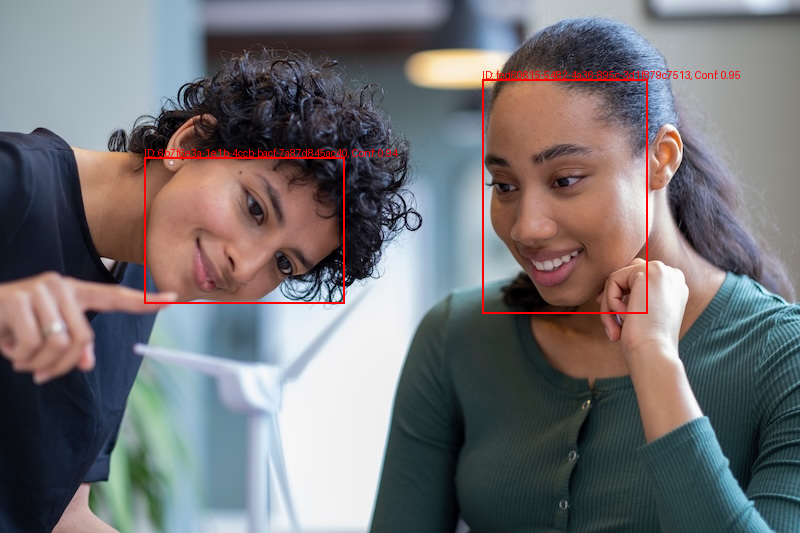

In [34]:
from PIL import Image, ImageDraw, ImageFont

# Group image for testing against
image_path = "../Data/face/group/group_1.jpeg"
file_content = read_file_content(image_path)

# Detect faces
face_ids = []
face_rectangles = {}
# We use detection model 03 to get better performance, recognition model 04 to support quality for recognition attribute.
# Check if the image is of sufficient quality for recognition.
faces = face_client.detect(
    file_content,
    detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
    recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
    return_face_id=True,
    return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
)

# Open the image using PIL
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for face in faces:
    # Only take the face if it is of sufficient quality.
    if face.face_attributes.quality_for_recognition != QualityForRecognition.LOW:
        face_ids.append(face.face_id)
        # Store face rectangle for later use
        face_rectangles[face.face_id] = face.face_rectangle
        # Draw bounding box
        rect = face.face_rectangle
        left = rect.left
        top = rect.top
        right = left + rect.width
        bottom = top + rect.height
        draw.rectangle(((left, top), (right, bottom)), outline="red", width=2)

# Identify faces
identify_results = face_client.identify_from_large_person_group(
    face_ids=face_ids,
    large_person_group_id=LARGE_PERSON_GROUP_ID,
)
print("Identifying faces in image")
for identify_result in identify_results:
    if identify_result.candidates:
        person_id = identify_result.candidates[0].person_id
        confidence = identify_result.candidates[0].confidence
        print(f"Person is identified for face ID {identify_result.face_id} in image, with a confidence of {confidence}.")  # Get topmost confidence score

        # Verify faces
        verify_result = face_client.verify_from_large_person_group(
            face_id=identify_result.face_id,
            large_person_group_id=LARGE_PERSON_GROUP_ID,
            person_id=person_id,
        )
        print(f"Person Identified: {person_id}. Verification result: {verify_result.is_identical}. confidence: {verify_result.confidence}")

        # Draw person ID and confidence on the image
        rect = face_rectangles[identify_result.face_id]
        left = rect.left
        top = rect.top
        draw.text((left, top - 10), f"ID: {person_id}, Conf: {confidence:.2f}", fill="red", font=font)
    else:
        print(f"No person identified for face ID {identify_result.face_id} in image.")

# Save or display the image with bounding boxes and labels
image.show()  # To display the image
#image.save("output_image_with_bounding_boxes_and_labels.jpg")  # To save the image

Identifying faces in image
Person is identified for face ID f6806d8d-46c9-4739-b2dd-f613e45024b4 in image, with a confidence of 0.98767.
Person Identified: 5626db68-2bdb-4a75-8bc7-8856a9507461. Verification result: True. confidence: 0.98767


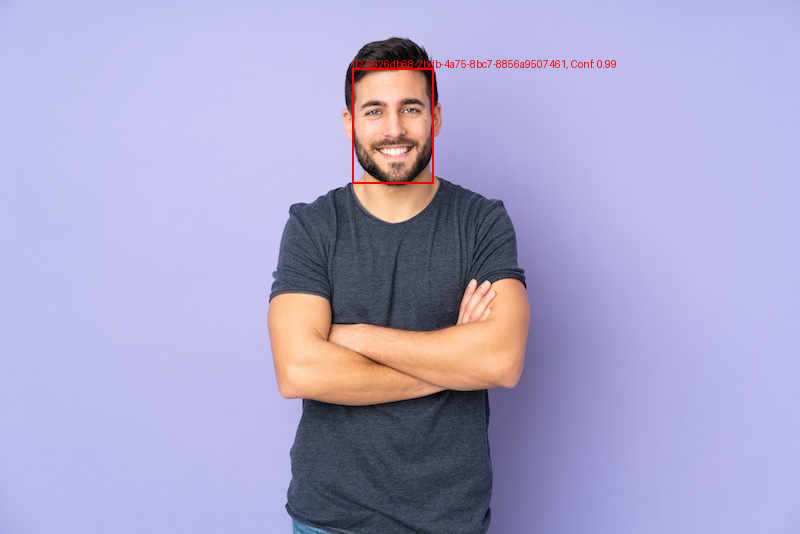

In [35]:
from PIL import Image, ImageDraw, ImageFont

# Group image for testing against
image_path = "../Data/face/person_c/person_c3.jpeg"
file_content = read_file_content(image_path)

# Detect faces
face_ids = []
face_rectangles = {}
# We use detection model 03 to get better performance, recognition model 04 to support quality for recognition attribute.
# Check if the image is of sufficient quality for recognition.
faces = face_client.detect(
    file_content,
    detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
    recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
    return_face_id=True,
    return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
)

# Open the image using PIL
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for face in faces:
    # Only take the face if it is of sufficient quality.
    if face.face_attributes.quality_for_recognition != QualityForRecognition.LOW:
        face_ids.append(face.face_id)
        # Store face rectangle for later use
        face_rectangles[face.face_id] = face.face_rectangle
        # Draw bounding box
        rect = face.face_rectangle
        left = rect.left
        top = rect.top
        right = left + rect.width
        bottom = top + rect.height
        draw.rectangle(((left, top), (right, bottom)), outline="red", width=2)

# Identify faces
identify_results = face_client.identify_from_large_person_group(
    face_ids=face_ids,
    large_person_group_id=LARGE_PERSON_GROUP_ID,
)
print("Identifying faces in image")
for identify_result in identify_results:
    if identify_result.candidates:
        person_id = identify_result.candidates[0].person_id
        confidence = identify_result.candidates[0].confidence
        print(f"Person is identified for face ID {identify_result.face_id} in image, with a confidence of {confidence}.")  # Get topmost confidence score

        # Verify faces
        verify_result = face_client.verify_from_large_person_group(
            face_id=identify_result.face_id,
            large_person_group_id=LARGE_PERSON_GROUP_ID,
            person_id=person_id,
        )
        print(f"Person Identified: {person_id}. Verification result: {verify_result.is_identical}. confidence: {verify_result.confidence}")

        # Draw person ID and confidence on the image
        rect = face_rectangles[identify_result.face_id]
        left = rect.left
        top = rect.top
        draw.text((left, top - 10), f"ID: {person_id}, Conf: {confidence:.2f}", fill="red", font=font)
    else:
        print(f"No person identified for face ID {identify_result.face_id} in image.")

# Save or display the image with bounding boxes and labels
image.show()  # To display the image
#image.save("output_image_with_bounding_boxes_and_labels.jpg")  # To save the image

## Clean up resources

In [36]:
# Delete the large person group
face_admin_client.large_person_group.delete(LARGE_PERSON_GROUP_ID)
print(f"The person group {LARGE_PERSON_GROUP_ID} is deleted.")

The person group c21c28ce-3bc2-4f38-a850-67aafc5a9448 is deleted.
